<a href="https://colab.research.google.com/github/Ajlackey8/Free_Project/blob/main/CleanUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [42]:
#no missing records
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [44]:
#dropping any duplicates
df.drop_duplicates(inplace=True)

In [45]:
#no inconsistent data
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [46]:
#no values appear to be unreasonable outliers
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


[Text(0.5, 1.0, 'ExerciseAngina')]

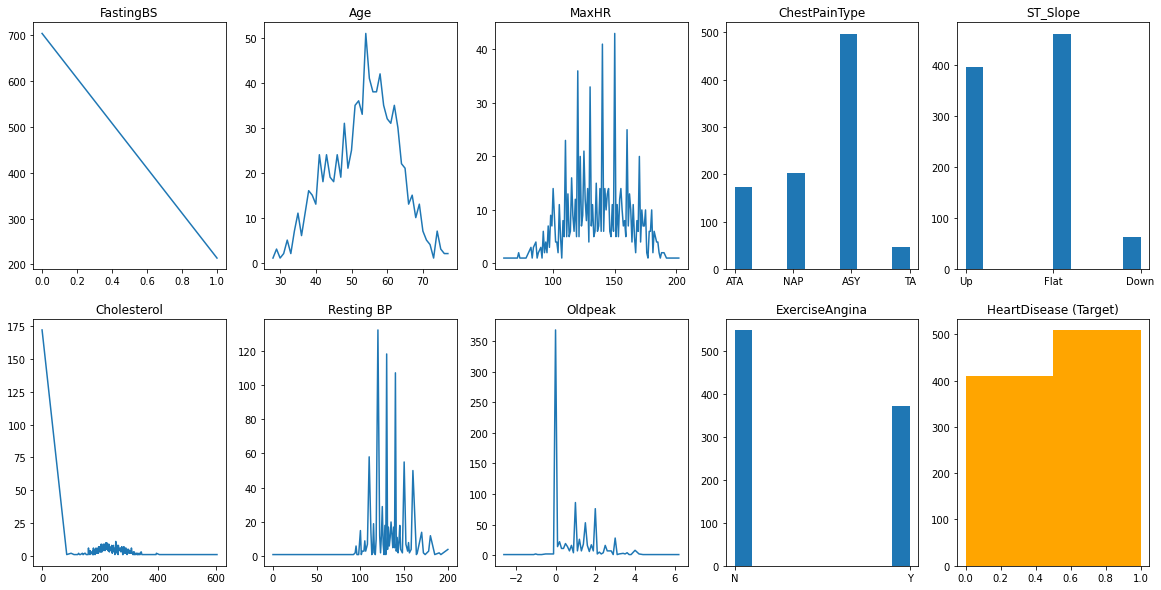

In [47]:
#univariate visualizations for every feature and the target...

fig, ax = plt.subplots(2,5,figsize=(20,10))
ax[0,1].plot(df['Age'].value_counts().sort_index())
ax[0,1].set(title='Age')
ax[1,1].plot(df['RestingBP'].value_counts().sort_index())
ax[1,1].set(title='Resting BP')
ax[1,0].plot(df['Cholesterol'].value_counts().sort_index())
ax[1,0].set(title='Cholesterol')
ax[0,0].plot(df['FastingBS'].value_counts().sort_index())
ax[0,0].set(title='FastingBS')
ax[0,2].plot(df['MaxHR'].value_counts().sort_index())
ax[0,2].set(title='MaxHR')
ax[1,2].plot(df['Oldpeak'].value_counts().sort_index())
ax[1,2].set(title='Oldpeak')
ax[1,4].hist(df['HeartDisease'],bins=2, color='orange')
ax[1,4].set(title='HeartDisease (Target)')
ax[0,3].hist(df['ChestPainType'])
ax[0,3].set(title='ChestPainType')
ax[0,4].hist(df['ST_Slope'])
ax[0,4].set(title='ST_Slope')
ax[1,3].hist(df['ExerciseAngina'])
ax[1,3].set(title='ExerciseAngina')

In [48]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


Text(0, 0.5, 'Max Heart Rate')

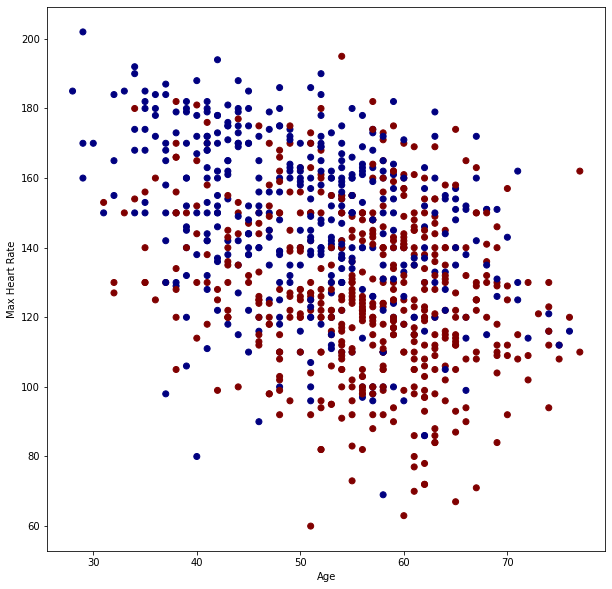

In [53]:
#Heart rate and resting blood pressure are both correlated with heart disease risk. to picture whether these two risk factors can be usefully predictive lets create a plot of them and color by whether or not they had heart disease.
plt.figure(figsize=(10,10))
plt.scatter(df['Age'], df['MaxHR'], c=df['HeartDisease'], cmap = 'jet')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')

In [50]:
#seeing as age and heart rate are correlated themselves and the clear bias for positives on the bottom right and negatives on the top left. It appears that we should expect older people to be more at risk of heart disease as well as people with lower heart rates
#observing that older people in general also have lower heart rates (and vis versa) helps us see a clear grouping trend. To further illustrate this point lets create a new plot clustering the data into two groups to see if it matches the identified trend.
scaler = StandardScaler()
df2 = df[['MaxHR','Age']]
scaled_df2 = scaler.fit_transform(df2)
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df2)
df2['cluster'] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Text(0, 0.5, 'Max Heart Rate')

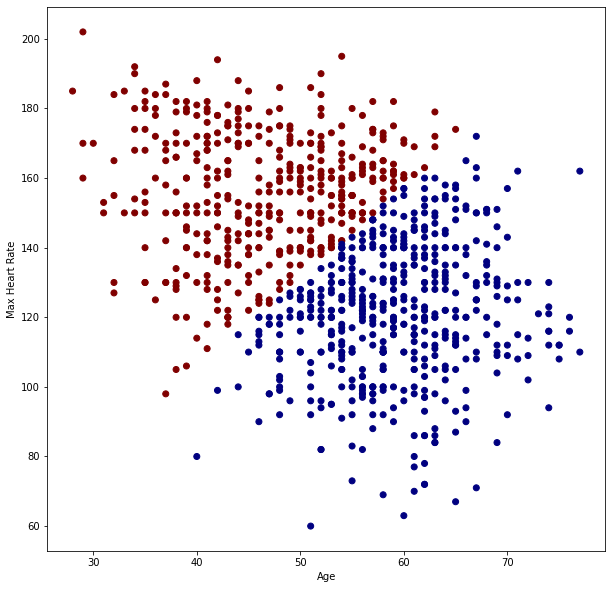

In [52]:
#not the most useful cluster but shows that the trend is to break it into bottom right corner and top left corner for rough groups.
#which fits with our visual observation that there appeared to be a significant risk factor associated with both old age and low max HR, with both combined trending into the two clusters.
plt.figure(figsize=(10,10))
plt.scatter(df['Age'], df['MaxHR'], c=df2['cluster'], cmap='jet')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')

Text(0.5, 0, 'Age')

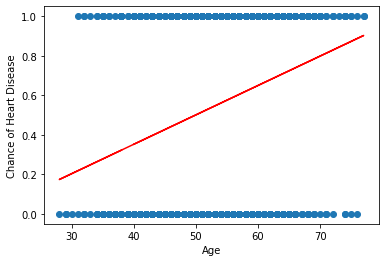

In [72]:
#to illustrate the correlations between each of these two categories lets first make a linear regression line to show the expected trend seen in the data
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
a = np.array(df[['Age']])
reg.fit(a, df['HeartDisease'])
predictions = reg.predict(a)

plt.scatter(df['Age'],df['HeartDisease'])
plt.plot(df['Age'], predictions, color='red')
plt.ylabel('Chance of Heart Disease')
plt.xlabel('Age')

Text(0.5, 0, 'MaxHR')

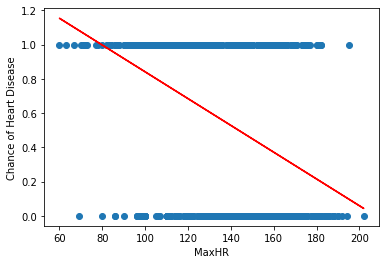

In [74]:
#We just demonstrated that with higher age is higher chance of heart disease, now this reg demonstrates that with higher max heart rate you see a lower rate of heart disease.
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
a = np.array(df[['MaxHR']])
reg.fit(a, df['HeartDisease'])
predictions = reg.predict(a)

plt.scatter(df['MaxHR'],df['HeartDisease'])
plt.plot(df['MaxHR'], predictions, color='red')
plt.ylabel('Chance of Heart Disease')
plt.xlabel('MaxHR')